<a href="https://colab.research.google.com/github/favourphilic/EverythingHamoye/blob/main/HamoyeStageB261122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv("/content/drive/MyDrive/HamoyeEverything/energydata_complete.csv")
print(df.shape)
df.head()

(19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['Year']= df['date'].dt.year
df['Month'] = df['date'].dt.month

In [23]:
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Year,Month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1


In [24]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Year,Month
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,2016.0,3.101647
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,0.0,1.339200
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,2016.0,1.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2016.0,2.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,2016.0,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,2016.0,4.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,2016.0,5.000000


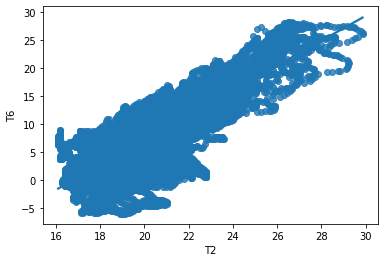

In [25]:
sns.regplot(x="T2", y="T6",
            data=df)

In [26]:
x= df[['T2']]
y= df[['T6']]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [27]:
lr.score(x,y)

0.6418990830855493

In [28]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Year', 'Month'],
      dtype='object')

In [29]:
col_to_drop = ['date','lights','Year', 'Month']
df1= df.drop(col_to_drop, axis=1)
df1.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [30]:
col = df1.columns

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ndf = pd.DataFrame(scaler.fit_transform(df1), columns=col)

In [32]:
ndf.head(2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.50000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.47619,0.894872,0.533937,0.372083,0.372083


In [33]:
x=ndf.copy()
y=x.pop('Appliances')
x.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)


In [35]:
mlr = LinearRegression()
#fitting the multiple linear model to the training dataset
mlr.fit(x_train, y_train)


LinearRegression()

In [36]:
#Lets get the predict values 
predicted_values = mlr.predict(x_test)


In [37]:
#Calculating the Mean Absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

In [38]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

45.348

In [39]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [41]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.15

In [42]:
importance = mlr.coef_
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00328
Feature: 1, Score: 0.55355
Feature: 2, Score: -0.23618
Feature: 3, Score: -0.45670
Feature: 4, Score: 0.29063
Feature: 5, Score: 0.09605
Feature: 6, Score: 0.02898
Feature: 7, Score: 0.02639
Feature: 8, Score: -0.01566
Feature: 9, Score: 0.01601
Feature: 10, Score: 0.23642
Feature: 11, Score: 0.03805
Feature: 12, Score: 0.01032
Feature: 13, Score: -0.04461
Feature: 14, Score: 0.10200
Feature: 15, Score: -0.15760
Feature: 16, Score: -0.18994
Feature: 17, Score: -0.03980
Feature: 18, Score: -0.32186
Feature: 19, Score: 0.00684
Feature: 20, Score: -0.07767
Feature: 21, Score: 0.02918
Feature: 22, Score: 0.01231
Feature: 23, Score: 0.11776
Feature: 24, Score: 0.00077
Feature: 25, Score: 0.00077


In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ypredridge = ridge_reg.predict(x_test)


rmseridge = np.sqrt(mean_squared_error(y_test, ypredridge))
round(rmseridge, 3) 

0.088

In [44]:
#Training a lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

importance = lasso_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01788
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00011
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.04956
Feature: 21, Score: 0.00291
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000


In [45]:
ypredlasso= lasso_reg.predict(x_test)
rmselasso = np.sqrt(mean_squared_error(y_test, ypredlasso))
round(rmselasso, 3) 

0.094